In [ ]:
from google.colab import files
files.upload()

# Árbol de desición con el dataset Titanic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
# Este nos ayuda a mandar a traer las gráficas
%matplotlib inline
# Inicializamos seaborn
sns.set()

### Cargando el data set

In [ ]:
# Traemos los datos
test_df = pd.read_csv("titanic_test.csv")
train_df = pd.read_csv("titanic_train.csv")

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


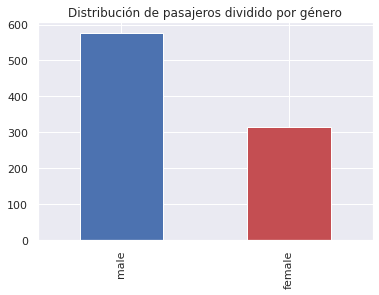

In [ ]:
# Vamos a obtener una gráfica de los pasajeros
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b','r'])
plt.title('Distribución de pasajeros dividido por género' )
plt.show()

Text(0.5, 1.0, 'Distribución de sobrevivientes')

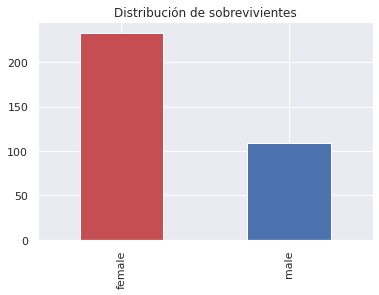

In [ ]:
# Ahora la lista de sobrevivientes según su genero
survives = train_df.loc[train_df['Survived'] == 1]
survive_men = survives.loc[survives['Sex'] == 'male']
survive_wom = survives.loc[survives['Sex'] == 'female']
survives.Sex.value_counts().plot(kind = 'bar', color = ['r','b'])
plt.title('Distribución de sobrevivientes')

### Asignando valores numéricos a la columna Sex

In [ ]:
from sklearn import preprocessing # Importamos el módulo de preprocessing

label_encoder = preprocessing.LabelEncoder() # Codifica las etiquetas con un valor entre 0 y n-1

encoder_sex = label_encoder.fit_transform(train_df['Sex']) # Asigna valores 0 y 1 a la columna Sex

In [ ]:
encoder_sex[0:5] # Vemos que cada una de las etiquetas de sexo recibe valor de 0 o 1

array([1, 0, 0, 0, 1])

In [ ]:
train_df.Sex = encoder_sex
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Donde 1 corresponde a `male` y 0 a `female`.

### Rellenando datos nulos

Recordemos que los árboles de decisión si se ven afectado por los datos nulos, por lo que hay que arreglar eso en el caso de tenerlos.

Para saber que variables tienen valores faltantes haremos lo siguiente:

In [ ]:
a =train_df.isnull()
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


O para saber si existe al menos una espacio en blanco podemos utilizar:

In [ ]:
b = train_df.isnull().any()
b

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

Podemos ver que las variables `Age`, `Cabin` y `Embarked` tienen valores nulos. Así que vamos a corregirlos (en este caso `Cabin` no nos importa mucho)

In [ ]:
# Rellenamos posibles datos nulos con la media
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
# Rellenamos posibles datos nulos con 'S'
train_df['Embarked'] = train_df['Embarked'].fillna('S')

Ya tenemos la información lista para seguir trabajando. Ahora, vamos a trabajar con nuestros predictores y para ello vamos a eliminar los atributos que no nos serán útiles.

### Eliminando variables inecesarias

Con `.drop` estamos eliminando las variables que no son de interés en el caso de su parámetro `axis` nos está indicando con `x=1` que hacemos referencia a las **columnas**, mientras que con `x=0` hacemos referencia a las filas.

In [ ]:
# Aquí quitamos los parámetros que no nos sirven 
# o que queremos que el modelo encuentre  como en el caso de "Survived"
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1 )

train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
888,3,0,28.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


### Separando los datos categoricos y numéricos

In [ ]:
# También separamos los datos categoricos recorriendo las columnas de la variable anterior
categorical_cols = [cname for cname in train_predictors.columns if 
                    train_predictors[cname].nunique() < 10 and # Si es un dato unico menor a 10
                    train_predictors[cname].dtype == 'object' # Si es un tipo de dato objeto
                                                              # entonces la definimos como categorica
                    ]
categorical_cols

['Embarked']

Recordemos que anteriormente hemos asignado valores de `0` y `1` a la columna `sex`, por eso solo nos quedamos con la columna `['Embarked']`.

In [ ]:
numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64','float64'] # Si es numérico
                 ]
my_cols

['Embarked', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
my_cols = categorical_cols + numerical_cols
my_cols

['Embarked', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
train_predictors = train_predictors[my_cols]
train_predictors

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare
0,S,3,1,22.0,1,0,7.2500
1,C,1,0,38.0,1,0,71.2833
2,S,3,0,26.0,0,0,7.9250
3,S,1,0,35.0,1,0,53.1000
4,S,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,S,2,1,27.0,0,0,13.0000
887,S,1,0,19.0,0,0,30.0000
888,S,3,0,28.0,1,2,23.4500
889,C,1,1,26.0,0,0,30.0000


### Descomponiendo la variable categorica

In [ ]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


Podemos ver que se crearon las variables `Embarked_C`,	`Embarked_Q` y `Embarked_S` haciendo referencia a los valores que tenía anteriormente.

### Separando los datos

In [ ]:
y_target = train_df['Survived'].values

In [ ]:
x_features_one = dummy_encoded_train_predictors.values
x_features_one

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  1.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 28., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, 
                                                                 test_size = 0.25, random_state=1)

### Llamando al modelo

In [ ]:
tree_one = tree.DecisionTreeClassifier()

### Entrenando al modelo

In [ ]:
tree_one = tree_one.fit(x_train, y_train)

### Score

In [ ]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 3)
tree_one_accuracy

0.744

### Visualizando

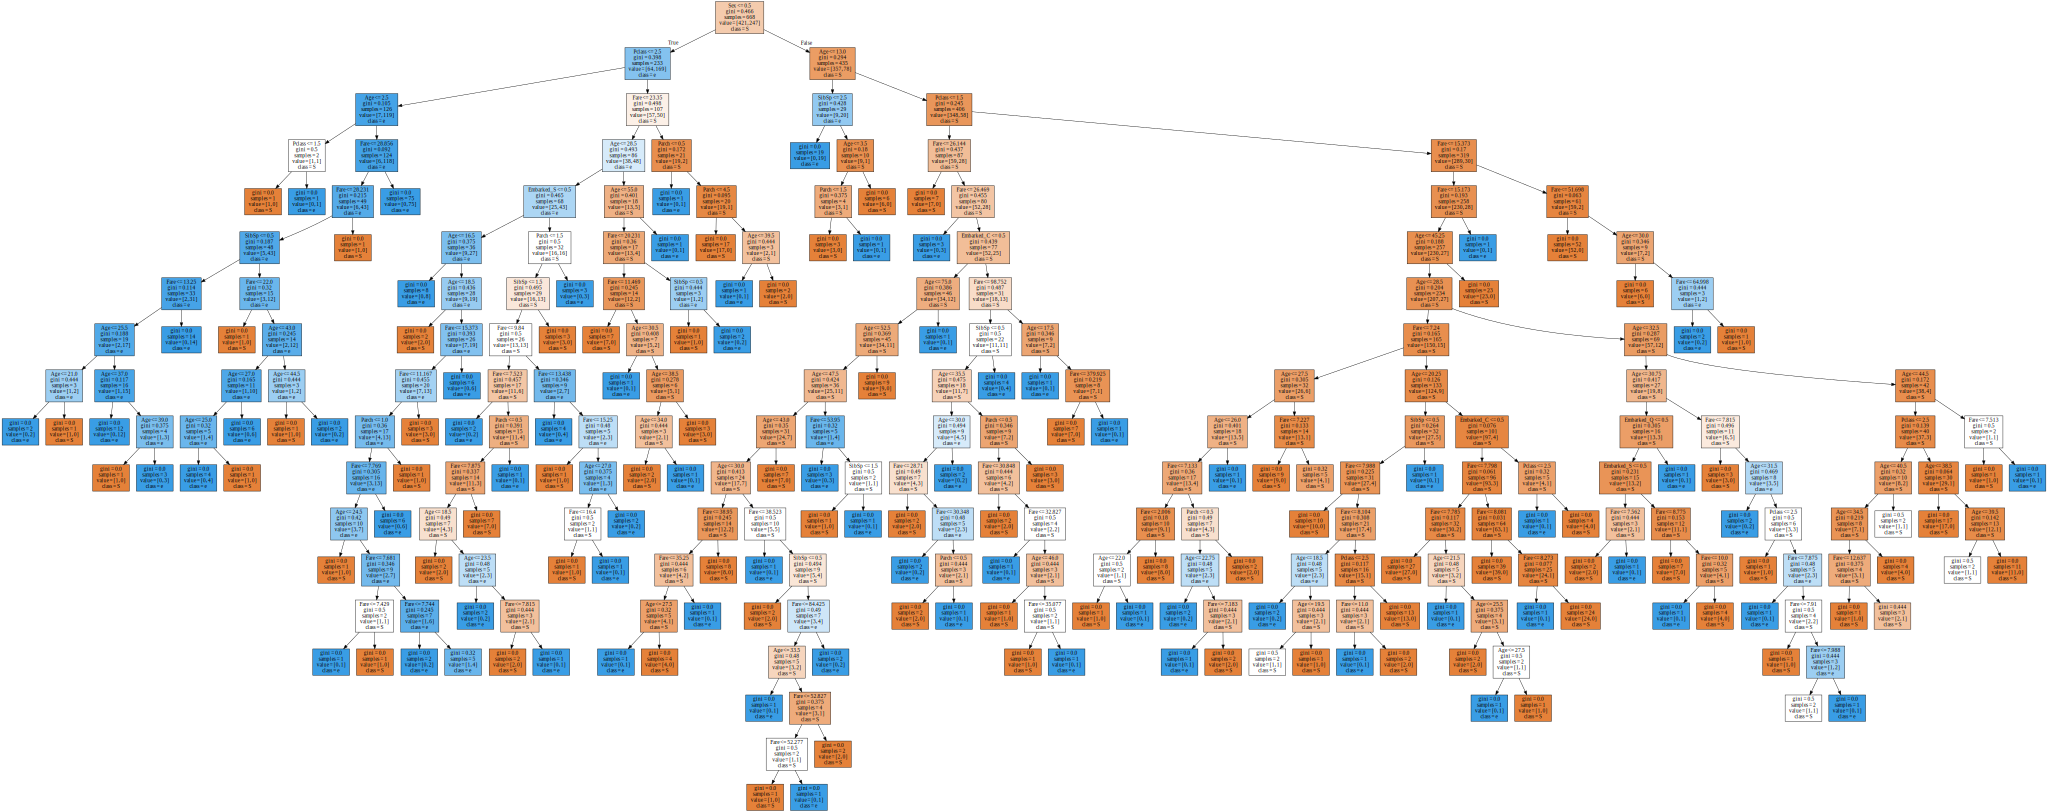

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_one, out_file=None, 
                                feature_names=dummy_encoded_train_predictors.columns,  
                                class_names= 'Sex',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

---